In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pylab import rcParams

In [5]:
#Plot Settings
sns.set()
plt.style.use('ggplot')
%matplotlib inline
rcParams['figure.figsize'] = 12, 8
rcParams["figure.titlesize"] = 15
rcParams['font.size'] = 15
#Setting seed
random.seed(42)

In [9]:
# url containing the dataset
url = 'https://bolin.su.se/data/stockholm/files/stockholm-historical-weather-observations-2017/' \
      'temperature/daily/stockholm_daily_mean_temperature_1756_2017.txt'
column_names = ['Year','Month','Day','Temperature_Raw','Temperature_Processed_1',
                'Temperature_Processed_2','Data_ID']
# Reading the Data
temperatures_raw = pd.read_csv(url,sep ='\s+',names = column_names)

In [10]:
temperatures_raw.shape

(95694, 7)

In [11]:
temperatures_raw.head()

,Year,Month,Day,Temperature_Raw,Temperature_Processed_1,Temperature_Processed_2,Data_ID
0,1756,1,1,-8.7,-8.7,-8.7,1
1,1756,1,2,-9.2,-9.2,-9.2,1
2,1756,1,3,-8.6,-8.6,-8.6,1
3,1756,1,4,-7.7,-7.7,-7.7,1
4,1756,1,5,-7.2,-7.2,-7.2,1


In [49]:
# Some Descriptive Statistics on Raw Data
temperatures_raw.describe()

,Year,Month,Day,Temperature_Raw,Temperature_Processed_1,Temperature_Processed_2,Data_ID
count,95694.000000,95694.000000,95694.000000,95694.000000,95694.000000,95694.000000,95694.000000
mean,1886.500418,6.523000,15.729429,6.125631,5.879808,5.813827,1.040421
std,75.633386,3.448702,8.800050,12.010071,8.350523,8.276964,0.277400
min,1756.000000,1.000000,1.000000,-999.000000,-27.700000,-27.700000,1.000000
25%,1821.000000,4.000000,8.000000,0.200000,-0.100000,-0.100000,1.000000
50%,1886.500000,7.000000,16.000000,5.700000,5.400000,5.400000,1.000000
75%,1952.000000,10.000000,23.000000,13.300000,13.000000,12.900000,1.000000
max,2017.000000,12.000000,31.000000,28.300000,27.500000,27.500000,3.000000


In [50]:
# Percentage of nas
temperatures_raw.isna().mean()

Year                       0.0
Month                      0.0
Day                        0.0
Temperature_Raw            0.0
Temperature_Processed_1    0.0
Temperature_Processed_2    0.0
Data_ID                    0.0
dtype: float64

In [65]:
temperatures = temperatures_raw.groupby(['Year','Month'])['Temperature_Processed_2'].mean().reset_index()
temperatures.shape

(3144, 3)

In [61]:
def cdf(data):
    """Compute Cumulative Distribution Function  for a array."""
    # Number of points n
    n = len(data)

    # x data for the CDF 
    x = np.sort(data)

    # y data for the CDF
    y = np.arange(1, n + 1 ) / n

    return x, y

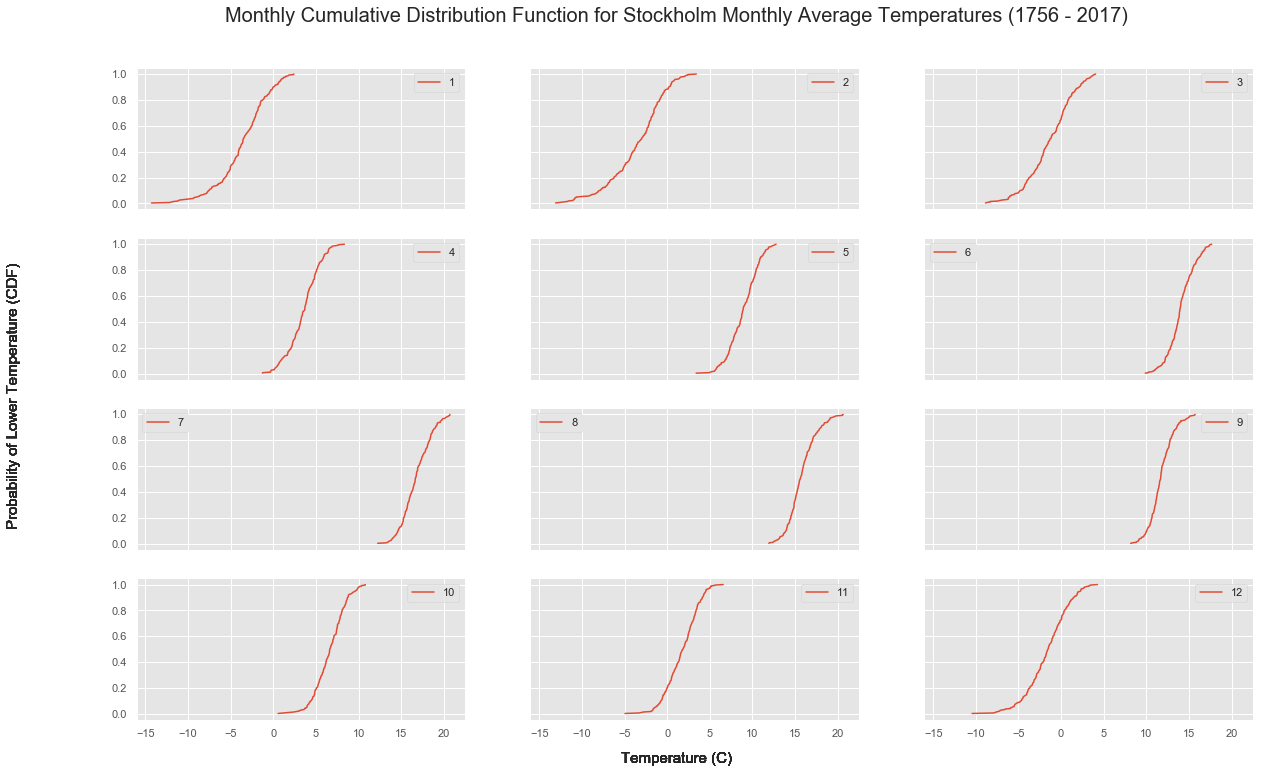

In [63]:
months = temperatures['Month'].unique().tolist()
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(20,12))
axes_list = [item for sublist in axes for item in sublist] 
for month in months:
    ax = axes_list.pop(0)
    x_month,cdf_month = cdf(temperatures[temperatures['Month'] == month]['Temperature_Processed_2'])
    ax.plot(x_month,cdf_month,label = month)
    fig.text(0.04, 0.5, 'Probability of Lower Temperature (CDF)', ha='center', va='center', rotation='vertical')
    fig.text(0.5,0.08, 'Temperature (C)', ha='center', va='center', rotation='horizontal')
    plt.suptitle('Monthly Cumulative Distribution Function for Stockholm Monthly Average Temperatures (1756 - 2017)', 
                 y = 0.95, size = 20)
    ax.legend()
plt.show()
fig.savefig('Stockholm_temperature_cdf.png');